In [126]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [127]:
df=pd.read_csv(r"/content/Ecommerce_Sales_Data_2024_2025.csv")

In [128]:

df.head()

,Order ID,Order Date,Customer Name,Region,City,Category,Sub-Category,Product Name,Quantity,Unit Price,Discount,Sales,Profit,Payment Mode
0,10001,2024-10-19,Kashvi Varty,South,Bangalore,Books,Non-Fiction,Non-Fiction Ipsum,2,36294,5,68958.6,10525.09,Debit Card
1,10002,2025-08-30,Advik Desai,North,Delhi,Groceries,Rice,Rice Nemo,1,42165,20,33732.0,6299.66,Debit Card
2,10003,2023-11-04,Rhea Kalla,East,Patna,Kitchen,Juicer,Juicer Odio,4,64876,20,207603.2,19850.27,Credit Card
3,10004,2025-05-23,Anika Sen,East,Kolkata,Groceries,Oil,Oil Doloribus,5,37320,15,158610.0,36311.02,UPI
4,10005,2025-01-19,Akarsh Kaul,West,Pune,Clothing,Kids Wear,Kids Wear Quo,1,50037,10,45033.3,9050.04,Debit Card


In [129]:

df.shape

(5000, 14)

In [130]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       5000 non-null   int64  
 1   Order Date     5000 non-null   object 
 2   Customer Name  5000 non-null   object 
 3   Region         5000 non-null   object 
 4   City           5000 non-null   object 
 5   Category       5000 non-null   object 
 6   Sub-Category   5000 non-null   object 
 7   Product Name   5000 non-null   object 
 8   Quantity       5000 non-null   int64  
 9   Unit Price     5000 non-null   int64  
 10  Discount       5000 non-null   int64  
 11  Sales          5000 non-null   float64
 12  Profit         5000 non-null   float64
 13  Payment Mode   5000 non-null   object 
dtypes: float64(2), int64(4), object(8)
memory usage: 547.0+ KB


In [131]:
df.describe()

,Order ID,Quantity,Unit Price,Discount,Sales,Profit
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,12500.500000,2.992600,39760.904600,10.051000,106733.204870,15941.746982
std,1443.520003,1.413133,22831.783946,7.084662,85108.208202,14897.684916
min,10001.000000,1.000000,222.000000,0.000000,264.100000,19.120000
25%,11250.750000,2.000000,20312.250000,5.000000,39766.537500,4892.295000
50%,12500.500000,3.000000,39459.500000,10.000000,83080.325000,11108.525000
75%,13750.250000,4.000000,59721.750000,15.000000,156968.587500,22467.987500
max,15000.000000,5.000000,79998.000000,20.000000,398485.000000,89688.440000


In [132]:

df.isnull().sum()

,0
Order ID,0
Order Date,0
Customer Name,0
Region,0
City,0
Category,0
Sub-Category,0
Product Name,0
Quantity,0
Unit Price,0


In [133]:
df.duplicated().sum()

np.int64(0)

In [134]:
df.nunique()

,0
Order ID,5000
Order Date,730
Customer Name,4844
Region,4
City,20
Category,10
Sub-Category,50
Product Name,3835
Quantity,5
Unit Price,4841


In [135]:
df.drop(['Customer Name','Order ID'],inplace=True,axis=1)

In [136]:
numeric_columns=['Unit Price','Discount','Sales','Profit']

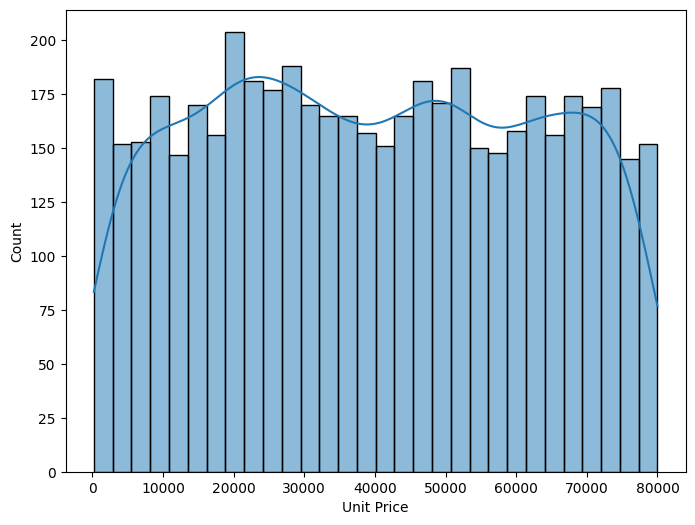

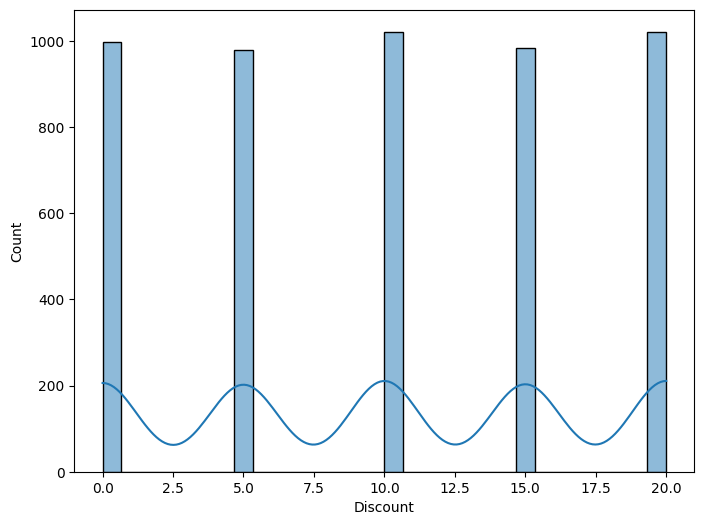

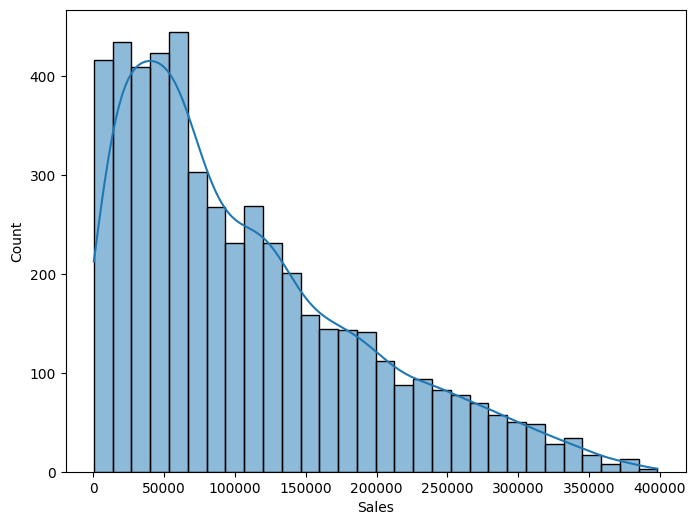

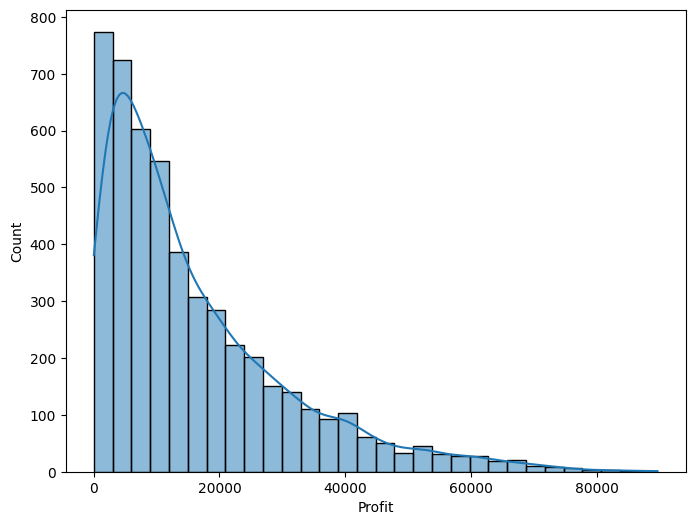

In [137]:
for col in numeric_columns:
  plt.figure(figsize=(8,6))
  sns.histplot(df[col],kde=True,bins=30)

<Axes: xlabel='Region', ylabel='count'>

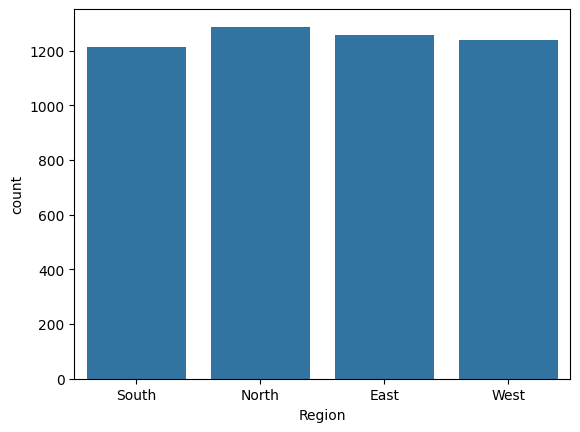

In [138]:
sns.countplot(x=df['Region'])

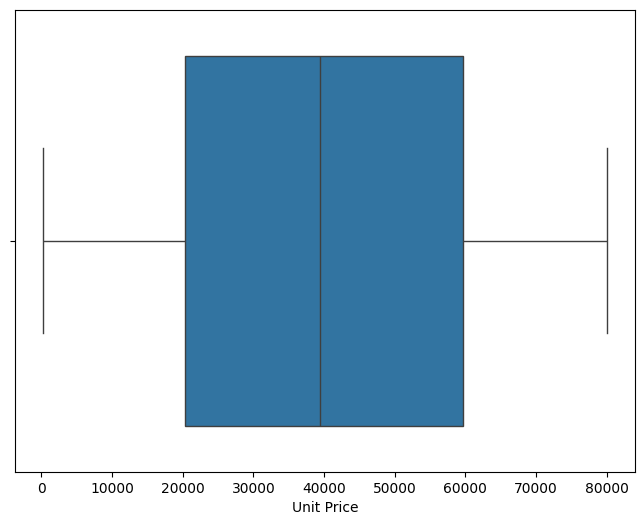

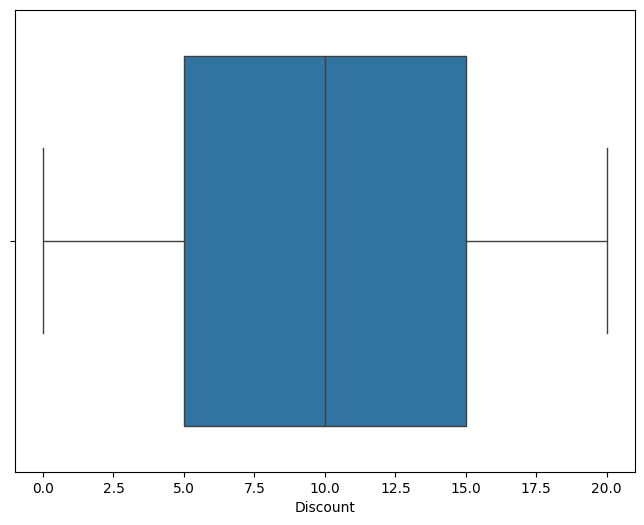

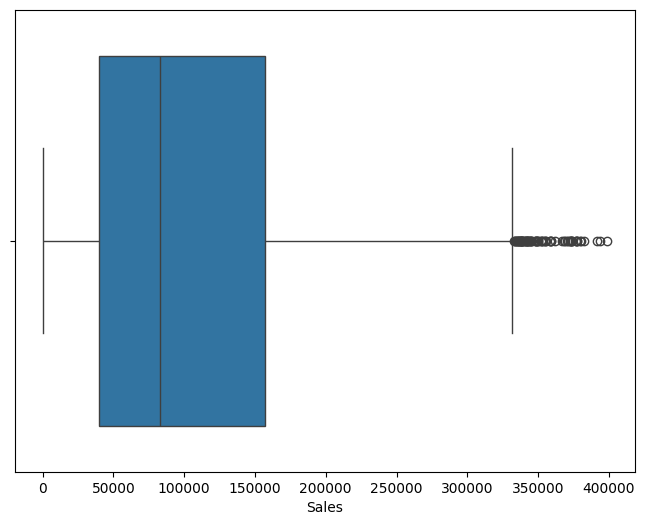

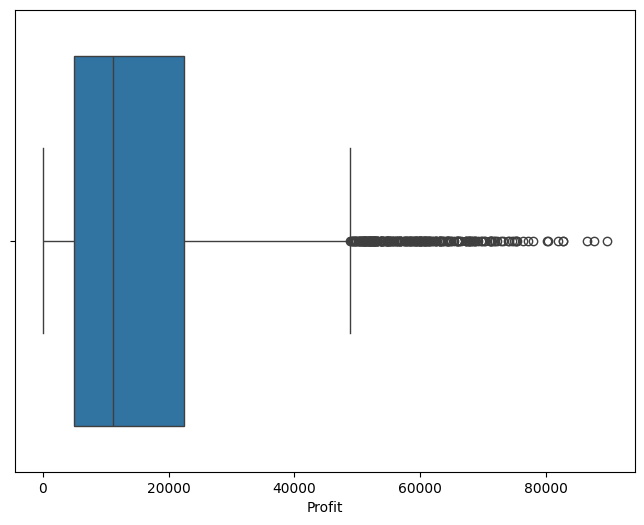

In [139]:
for col in numeric_columns:
  plt.figure(figsize=(8,6))
  sns.boxplot(x=df[col])

<Axes: >

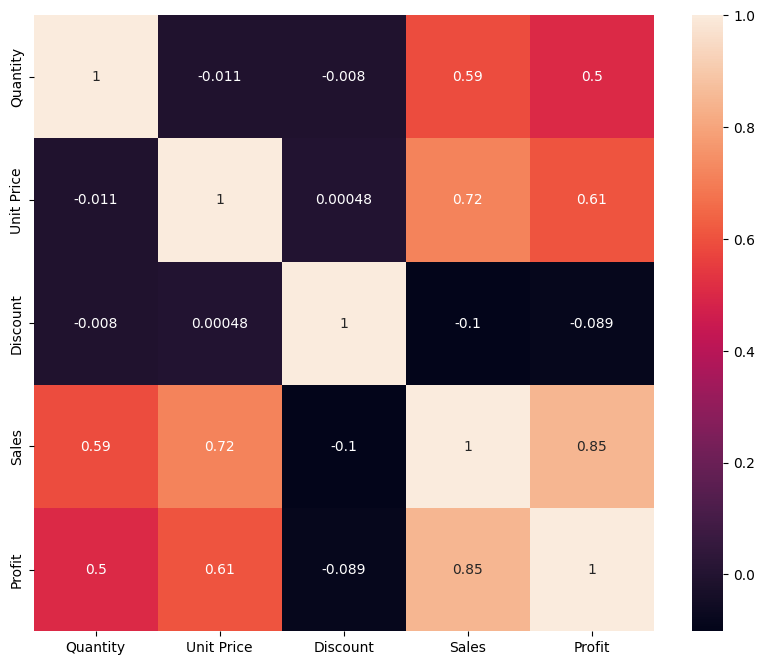

In [140]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(numeric_only=True),annot=True)

In [141]:
df['Region'].value_counts()

,count
Region,
North,1288
East,1256
West,1241
South,1215


In [142]:
categorical_cols = ['Region', 'City', 'Category', 'Sub-Category', 'Payment Mode']

df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

In [143]:

df.head()

,Order Date,Product Name,Quantity,Unit Price,Discount,Sales,Profit,Region_North,Region_South,Region_West,...,Sub-Category_Textbook,Sub-Category_Vase,Sub-Category_Wall Art,Sub-Category_Wheat,Sub-Category_Women's Wear,Sub-Category_Yoga Mat,Payment Mode_Credit Card,Payment Mode_Debit Card,Payment Mode_Net Banking,Payment Mode_UPI
0,2024-10-19,Non-Fiction Ipsum,2,36294,5,68958.6,10525.09,False,True,False,...,False,False,False,False,False,False,False,True,False,False
1,2025-08-30,Rice Nemo,1,42165,20,33732.0,6299.66,True,False,False,...,False,False,False,False,False,False,False,True,False,False
2,2023-11-04,Juicer Odio,4,64876,20,207603.2,19850.27,False,False,False,...,False,False,False,False,False,False,True,False,False,False
3,2025-05-23,Oil Doloribus,5,37320,15,158610.0,36311.02,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,2025-01-19,Kids Wear Quo,1,50037,10,45033.3,9050.04,False,False,True,...,False,False,False,False,False,False,False,True,False,False


In [144]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month
df['Day'] = df['Order Date'].dt.day
df['Weekday'] = df['Order Date'].dt.day_name()
df['Quarter'] = df['Order Date'].dt.quarter
df['Is_Weekend'] = df['Order Date'].dt.weekday >= 5
df = pd.get_dummies(df, columns=['Weekday', 'Is_Weekend'], drop_first=True)
df['Month_sin'] = np.sin(2 * np.pi * df['Month'] / 12)
df['Month_cos'] = np.cos(2 * np.pi * df['Month'] / 12)
df['Day_sin'] = np.sin(2 * np.pi * df['Day'] / 31)
df['Day_cos'] = np.cos(2 * np.pi * df['Day'] / 31)
df = df.drop(['Order Date'], axis=1)

In [145]:
bool_cols = df.select_dtypes(include=['bool']).columns
df[bool_cols] = df[bool_cols].astype(int)

In [146]:
df['Product_Avg_Sales'] = df.groupby('Product Name')['Sales'].transform('mean')
df['Product_Avg_Profit'] = df.groupby('Product Name')['Profit'].transform('mean')
df['Product_Order_Count'] = df.groupby('Product Name')['Quantity'].transform('count')

In [147]:
df = df.drop('Product Name', axis=1)

In [148]:
df.head()

,Quantity,Unit Price,Discount,Sales,Profit,Region_North,Region_South,Region_West,City_Amritsar,City_Bangalore,...,Weekday_Tuesday,Weekday_Wednesday,Is_Weekend_True,Month_sin,Month_cos,Day_sin,Day_cos,Product_Avg_Sales,Product_Avg_Profit,Product_Order_Count
0,2,36294,5,68958.6,10525.09,0,1,0,0,1,...,0,0,1,-0.866025,0.500000,-0.651372,-0.758758,178956.800000,25479.505000,2
1,1,42165,20,33732.0,6299.66,1,0,0,0,0,...,0,0,1,-0.866025,-0.500000,-0.201299,0.979530,40187.450000,6750.535000,2
2,4,64876,20,207603.2,19850.27,0,0,0,0,0,...,0,0,1,-0.500000,0.866025,0.724793,0.688967,91628.666667,10663.603333,3
3,5,37320,15,158610.0,36311.02,0,0,0,0,0,...,0,0,0,0.500000,-0.866025,-0.998717,-0.050649,158610.000000,36311.020000,1
4,1,50037,10,45033.3,9050.04,0,0,1,0,0,...,0,0,1,0.500000,0.866025,-0.651372,-0.758758,40532.850000,6372.065000,2


In [149]:
X=df.drop('Sales',axis=1)
y=df['Sales']

In [150]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42)

In [151]:
import xgboost

In [152]:
import optuna
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost
import lightgbm as lgb
from sklearn.metrics import mean_squared_error
import numpy as np

# Optional CatBoost
try:
    import catboost as cb
    CATBOOST_INSTALLED = True
except:
    CATBOOST_INSTALLED = False
    print("CatBoost not installed, skipping it.")

# -------------------------------

def objective(trial):
    # Available models
    models = ["DecisionTree", "RandomForest", "XGBoost", "LightGBM"]
    if CATBOOST_INSTALLED:
        models.append("CatBoost")

    model_name = trial.suggest_categorical("model", models)
    if model_name == "DecisionTree":
        max_depth = trial.suggest_int("dt_max_depth", 3, 20)
        min_samples_split = trial.suggest_int("dt_min_samples_split", 2, 20)
        model = DecisionTreeRegressor(max_depth=max_depth,
                                      min_samples_split=min_samples_split,
                                      random_state=42)

    elif model_name == "RandomForest":
        n_estimators = trial.suggest_int("rf_n_estimators", 50, 500)
        max_depth = trial.suggest_int("rf_max_depth", 3, 20)
        min_samples_split = trial.suggest_int("rf_min_samples_split", 2, 20)
        model = RandomForestRegressor(n_estimators=n_estimators,
                                      max_depth=max_depth,
                                      min_samples_split=min_samples_split,
                                      n_jobs=-1,
                                      random_state=42)

    elif model_name == "XGBoost":
        n_estimators = trial.suggest_int("xgb_n_estimators", 50, 500)
        max_depth = trial.suggest_int("xgb_max_depth", 3, 15)
        learning_rate = trial.suggest_float("xgb_lr", 0.01, 0.3)
        subsample = trial.suggest_float("xgb_subsample", 0.5, 1.0)
        model = xgboost.XGBRegressor(n_estimators=n_estimators,
                                 max_depth=max_depth,
                                 learning_rate=learning_rate,
                                 subsample=subsample,
                                 n_jobs=-1,
                                 random_state=42,
                                 tree_method='hist')
    elif model_name == "LightGBM":
        n_estimators = trial.suggest_int("lgb_n_estimators", 50, 500)
        max_depth = trial.suggest_int("lgb_max_depth", 3, 20)
        learning_rate = trial.suggest_float("lgb_lr", 0.01, 0.3)
        num_leaves = trial.suggest_int("lgb_num_leaves", 20, 150)
        model = lgb.LGBMRegressor(n_estimators=n_estimators,
                                  max_depth=max_depth,
                                  learning_rate=learning_rate,
                                  num_leaves=num_leaves,
                                  n_jobs=-1,
                                  random_state=42)

    else:  # CatBoost
        n_estimators = trial.suggest_int("cb_n_estimators", 50, 500)
        max_depth = trial.suggest_int("cb_max_depth", 3, 10)
        learning_rate = trial.suggest_float("cb_lr", 0.01, 0.3)
        model = cb.CatBoostRegressor(iterations=n_estimators,
                                     depth=max_depth,
                                     learning_rate=learning_rate,
                                     silent=True,
                                     random_state=42)

    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    return rmse

# -------------------------------

study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=50, show_progress_bar=True)

# -------------------------------

print("Best RMSE:", study.best_value)
print("Best model & hyperparameters:", study.best_trial.params)

[I 2025-10-27 13:28:22,963] A new study created in memory with name: no-name-a2c13089-3c04-4844-839f-7374fc77859c


  0%|          | 0/50 [00:00<?, ?it/s]

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000192 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1349
[LightGBM] [Info] Number of data points in the train set: 4000, number of used features: 106
[LightGBM] [Info] Start training from score 106563.943150
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

In [153]:
from catboost import CatBoostRegressor

# -------------------------------
# Best hyperparameters
best_params = {
    'iterations': 297,
    'depth': 5,
    'learning_rate': 0.1921999067137064,
    'random_state': 42,

}
model = CatBoostRegressor(**best_params)
model.fit(X_train, y_train)
preds = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE:", rmse)

0:	learn: 71763.7226773	total: 1.34ms	remaining: 396ms
1:	learn: 60662.3786987	total: 2.85ms	remaining: 420ms
2:	learn: 52339.8565335	total: 4.08ms	remaining: 400ms
3:	learn: 45329.7691681	total: 5.26ms	remaining: 385ms
4:	learn: 39674.9439725	total: 6.45ms	remaining: 377ms
5:	learn: 34845.7418393	total: 7.68ms	remaining: 372ms
6:	learn: 30376.3183390	total: 8.91ms	remaining: 369ms
7:	learn: 27311.3851610	total: 10.1ms	remaining: 364ms
8:	learn: 25188.6442348	total: 11.2ms	remaining: 359ms
9:	learn: 22872.0525111	total: 12.4ms	remaining: 355ms
10:	learn: 20745.3659492	total: 13.5ms	remaining: 352ms
11:	learn: 19226.3438844	total: 14.7ms	remaining: 349ms
12:	learn: 17941.0762066	total: 15.9ms	remaining: 347ms
13:	learn: 16879.3966470	total: 17ms	remaining: 344ms
14:	learn: 15811.2894553	total: 18.2ms	remaining: 343ms
15:	learn: 14917.5181060	total: 19.3ms	remaining: 339ms
16:	learn: 14180.6187047	total: 20.4ms	remaining: 337ms
17:	learn: 13683.8643691	total: 21.6ms	remaining: 334ms
18:	

In [154]:
# Predict on same dataset (ya alag test set agar available ho)
preds = model.predict(X_test)

# Evaluate RMSE / R2
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

rmse = np.sqrt(mean_squared_error(y_test, preds))
r2 = r2_score(y_test, preds)

print("RMSE:", rmse)
print("R2 Score:", r2)

RMSE: 2980.6137785954106
R2 Score: 0.9988312490658119


In [155]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Predict on the training set
preds_train = model.predict(X_train)

# Evaluate RMSE and R2 on the training set
rmse_train = np.sqrt(mean_squared_error(y_train, preds_train))
r2_train = r2_score(y_train, preds_train)

print("Training Set Metrics:")
print("RMSE:", rmse_train)
print("R2 Score:", r2_train)

print("\nTest Set Metrics:")
print("RMSE:", rmse) # Use the previously calculated test RMSE
print("R2 Score:", r2) # Use the previously calculated test R2

Training Set Metrics:
RMSE: 1904.898325751238
R2 Score: 0.9994926382318832

Test Set Metrics:
RMSE: 2980.6137785954106
R2 Score: 0.9988312490658119


In [156]:
train_r2 = 0.999728
test_r2 = 0.999027
diff = train_r2 - test_r2   # 0.000701
diff

0.0007009999999999517

In [159]:
import nbformat
import os

# 👉 अपने notebook का नाम यहाँ डालें
notebook_path = "/content/your_notebook.ipynb"

# Check कि फ़ाइल मौजूद है
if not os.path.exists(notebook_path):
    print(f"⚠️ File not found: {notebook_path}")
else:
    # Notebook पढ़ना
    nb = nbformat.read(notebook_path, as_version=nbformat.NO_CONVERT)

    # Metadata से widgets हटाना (अगर मौजूद हैं)
    if "widgets" in nb["metadata"]:
        del nb["metadata"]["widgets"]
        print("🧹 Removed 'widgets' metadata")

    # Clean version सेव करना
    cleaned_path = notebook_path.replace(".ipynb", "_clean.ipynb")
    nbformat.write(nb, cleaned_path)
    print(f"✅ Clean notebook saved as: {cleaned_path}")


⚠️ File not found: /content/your_notebook.ipynb
